<a href="https://colab.research.google.com/github/SanalMohammed/mmm/blob/main/penguins.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#1. Import the relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans


In [ ]:
#2. Load the input data
penguins=pd.read_csv('/content/penguins.csv')


In [ ]:
penguins.head(5)

,Unnamed: 0,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,1,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,2,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,3,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,4,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,5,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [ ]:
#3. Do EDA
#3a.remove irrelevant columns

penguins=penguins.drop(penguins.columns[0],axis=1)
penguins
#4. Implement k-means algo
#5. Visualize the results

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


In [ ]:
#3b.check for null values
penguins.isna().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

In [ ]:
#3c. fill the null values with relevant data

In [ ]:
penguins['bill_length_mm']=penguins['bill_length_mm'].fillna(value=penguins['bill_length_mm'].mean())
penguins['bill_depth_mm']=penguins['bill_depth_mm'].fillna(value=penguins['bill_depth_mm'].mean())
penguins['flipper_length_mm']=penguins['flipper_length_mm'].fillna(value=penguins['flipper_length_mm'].mean())
penguins['body_mass_g']=penguins['body_mass_g'].fillna(value=penguins['body_mass_g'].mean())
penguins['sex']=penguins['sex'].fillna('female')
penguins.isna().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
year                 0
dtype: int64

In [ ]:
#3d. make sure all entries in the column are same : either male or female

In [ ]:
penguins.loc[penguins['sex']=='FEMALE']='female'
penguins.loc[penguins['sex']=='Female']='female'
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,43.92193,17.15117,200.915205,4201.754386,female,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007
...,...,...,...,...,...,...,...,...
339,Chinstrap,Dream,55.8,19.8,207.0,4000.0,male,2009
340,Chinstrap,Dream,43.5,18.1,202.0,3400.0,female,2009
341,Chinstrap,Dream,49.6,18.2,193.0,3775.0,male,2009
342,Chinstrap,Dream,50.8,19.0,210.0,4100.0,male,2009


In [ ]:
penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   species            344 non-null    object
 1   island             344 non-null    object
 2   bill_length_mm     344 non-null    object
 3   bill_depth_mm      344 non-null    object
 4   flipper_length_mm  344 non-null    object
 5   body_mass_g        344 non-null    object
 6   sex                344 non-null    object
 7   year               344 non-null    object
dtypes: object(8)
memory usage: 21.6+ KB


In [ ]:
#3e. One hot encoding of categorical columns

In [ ]:
pen_df=penguins.drop(['year','species'],axis=1) # dropping the year column
#pen_df=pen_df.drop('species',axis=1)
cat_col=['island','sex']
cat_col_encoded=pd.get_dummies(pen_df[cat_col],prefix_sep='.',drop_first=False,sparse=False)
pen_df=pen_df.drop(pen_df[cat_col],axis=1)
pen_df=pd.concat([pen_df,cat_col_encoded],axis=1)
pen_df

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,island.Biscoe,island.Dream,island.Torgersen,sex.female,sex.male
0,39.1,18.7,181.0,3750.0,0,0,1,0,1
1,39.5,17.4,186.0,3800.0,0,0,1,1,0
2,40.3,18.0,195.0,3250.0,0,0,1,1,0
3,43.92193,17.15117,200.915205,4201.754386,0,0,1,1,0
4,36.7,19.3,193.0,3450.0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...
339,55.8,19.8,207.0,4000.0,0,1,0,0,1
340,43.5,18.1,202.0,3400.0,0,1,0,1,0
341,49.6,18.2,193.0,3775.0,0,1,0,0,1
342,50.8,19.0,210.0,4100.0,0,1,0,0,1


In [ ]:
pen_df.head(5)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,island.Biscoe,island.Dream,island.Torgersen,sex.female,sex.male
0,39.1,18.7,181.0,3750.0,0,0,1,0,1
1,39.5,17.4,186.0,3800.0,0,0,1,1,0
2,40.3,18.0,195.0,3250.0,0,0,1,1,0
3,43.92193,17.15117,200.915205,4201.754386,0,0,1,1,0
4,36.7,19.3,193.0,3450.0,0,0,1,1,0


In [ ]:
# step4 : implement K-means algo

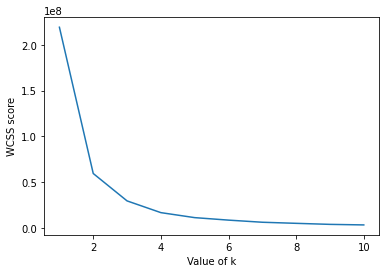

In [ ]:
#elbow method : k[1:10] vs distortion[wcss]

wcss=[]
for k in range(1,11):
  km=KMeans(n_clusters=k,init='k-means++',n_init=10,random_state=101)
  km.fit(pen_df)
  wcss.append(km.inertia_)
plt.plot(range(1,11),wcss)
plt.xlabel('Value of k')
plt.ylabel('WCSS score')
plt.show()  

k=3 can be taken as the optimal k value

In [ ]:
model=KMeans(n_clusters=3,init='k-means++',n_init=10, random_state=101)

In [ ]:
model.fit(pen_df)

KMeans(n_clusters=3, random_state=101)

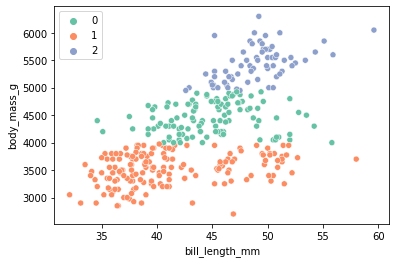

In [ ]:
sns.scatterplot(x=pen_df['bill_length_mm'],y=pen_df['body_mass_g'],hue=model.labels_,palette='Set2')
plt.show()


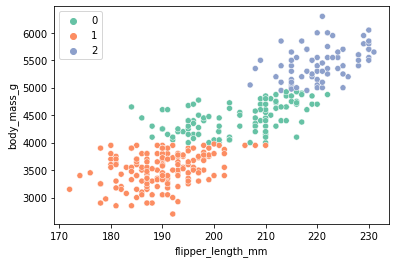

In [ ]:
sns.scatterplot(x=pen_df['flipper_length_mm'],y=pen_df['body_mass_g'],hue=model.labels_,palette='Set2')
plt.show()